# Internal waves

The governing equation for 2D internal waves can be expressed in terms of the vertical velocity  $w(x,z,t)$ as

$$ \partial_t^2 [ \partial_x^2 + \partial_z^2] w + N^2(z)\partial_x^2 w = 0$$

We look for solutions in the form

$$ w(x,z,t) = \tilde w(z) e^{i(kx - \omega t)} $$

which yields a 1D equation for the vertical structure $\tilde w(z)$

$$ \omega^2 k^2 \tilde w(z) - \omega^2 \partial_z^2 \tilde w - k^2 N^2(z) \tilde w = 0 $$ 

We discretized the governing equation as

$$ ( {\bf{A}}  - \omega^2 {\bf{B}} ) \tilde w = 0 $$

where

$$ {\bf{A}} = k^2 diag(N^2) $$

and 

$$ {\bf{B}} = k^2 {\bf{I}} - {\bf{D}}_2 $$

where ${\bf{D}}_2$ is the matrix for the second derivative.

In [17]:
using LinearAlgebra
using Plots

Define some model parameters

In [18]:
H = 1;  # depth of layer
L = 10; # horizontal wavelength
k = 2 * pi / L;  # wavenumber
println("wavenumber = ",k)

wavenumber = 0.6283185307179586


Define the grid

In [19]:
n = 51;
ninterior = n-2;
dz = H / (n-1);
z = (dz : dz : H-dz);

Define depth-dependent stratification

In [20]:
#N2 = ones(ninterior);
N2 = z;

Define matrices

In [21]:
A = k^2 * Diagonal(N2)
D2 = SymTridiagonal(-2*ones(ninterior),ones(ninterior-1))/dz^2
B = k^2 * Diagonal(ones(ninterior)) - D2;

Evaluate eigenvalues and eigenvectors

In [22]:
Am = convert(Matrix,A);
Bm = convert(Matrix,B);
F = eigen(Am,Bm)
omega2 = F.values;
x = F.vectors;

Frequency = 0.14164223108786328


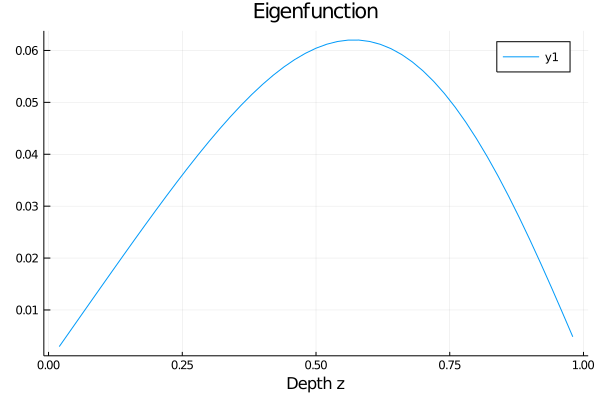

In [7]:
println("Frequency = ",sqrt(omega2[end]))
plot(z,x[:,end],xlabel="Depth z", title="Eigenfunction")

Theoretical frequency  (only valid for constant $N^2$)

In [8]:
freq = sqrt(N2[1] * k^2 / (k^2 + pi^2))

0.027735009811261455

Eigenfunction are not orthogonal for depth-dependent $N^2(z)$. Demonstrate by taking inner product of each eigenvector with the last eigenvector. This means that the modes are not normal.

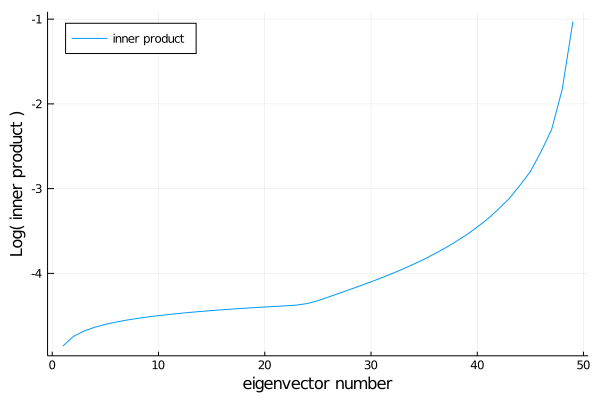

In [9]:
inner_product = zeros(ninterior)
for i = 1 : ninterior
    inner_product[i] = abs(x[:,ninterior]'*x[:,i])
end
plot((1:1:ninterior),log10.(inner_product),
    legend=:topleft,
    label="inner product",
    xlabel="eigenvector number",
    ylabel="Log( inner product )")

Eigenvalues of Adjoint Problem

Frequency = 0.14164223108786328


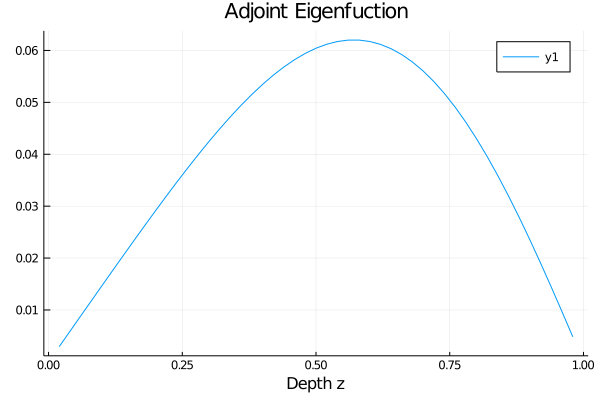

In [23]:
Aa = convert(Matrix,A');
Ba = convert(Matrix,B');
Fa = eigen(Aa,Ba)
omega2a = Fa.values;
y = Fa.vectors;
println("Frequency = ", sqrt(omega2a[end]))
plot(z,y[:,end],xlabel="Depth z",title="Adjoint Eigenfuction")

Inner Product using adjoint solution

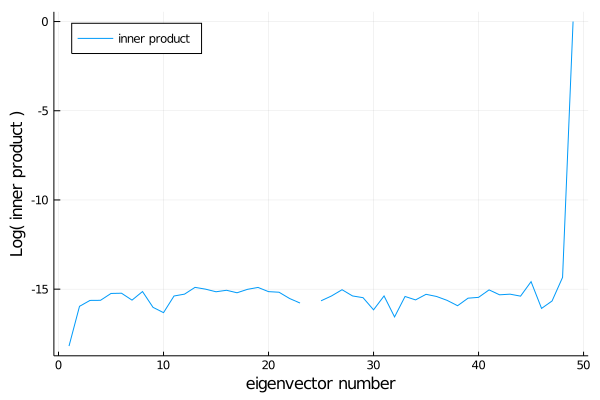

In [11]:
for i = 1 : ninterior
    inner_product[i] = abs(y[:,ninterior]'*(Bm * x[:,i]))
end
plot((1:1:ninterior),log10.(inner_product),
    legend=:topleft,
    label="inner product",
    xlabel="eigenvector number",
    ylabel="Log( inner product )")

# Wave periods in the core

In [16]:
H = 200e3 # Layer thickness in m
L = 2000e3 # Horizontal size in m
Nprime = 0.583
Omega = 2. * pi / 86400
kz = 2. * pi / H
kh = 2. * pi / L
omega = sqrt( (Nprime*Omega*kh/kz)^2)
T_days = 2. * pi / omega / 86400
println("period = ",T_days,"days")

omega = sqrt( (Nprime*Omega*kh/kz)^2 + (2*Omega*sin(50*pi/180))^2)
T_days = 2. * pi / omega / 86400
println("period (with rotation) = ",T_days,"days")

period = 17.15265866209262days
period (with rotation) = 0.6522315991296447days


# Forced waves

The governing equation for 2D internal waves, with rotation, forced by radial seismic displacements (whose velocity is denoted $w_s$) is

$$ \partial_t^2 [ \partial_x^2 + \partial_z^2] w + N^2(z)\partial_x^2 w + f^2 \partial_z^2 w = - (\partial_t^2+N(z)^2)\partial_x^2w_s$$

With one Fourier component $ w_s(x,t) = \tilde w_s e^{i(kx - \omega t)} $ and $ w(x,z,t) = \tilde w(z) e^{i(kx - \omega t)} $, one gets a forced 1D equation for the vertical structure $\tilde w(z)$

$$ (\omega^2 - N^2(z)) k^2 \tilde w + (f^2 - \omega^2) \partial_z^2 \tilde w = - (\omega^2 - N^2(z)) k^2 \tilde w_s $$ 

Once discretized, the equation becomes
$$ ( {\bf{A}}  - \omega^2 {\bf{B}} ) \tilde w = F $$

where $ {\bf{A}} = k^2 \mathrm{diag}(N^2) - f^2 {\bf{D}}_2 $, $ {\bf{B}} = k^2 {\bf{I}} - {\bf{D}}_2 $ and 

$$F = - (\omega^2 - N^2(z)) k^2 \tilde w_s$$


In [34]:
f=0;

In [35]:
D2 = SymTridiagonal(-2*ones(ninterior),ones(ninterior-1))/dz^2
A = k^2 * Diagonal(N2) - f^2 * D2
B = k^2 * Diagonal(ones(ninterior)) - D2;

Am = convert(Matrix,A);
Bm = convert(Matrix,B);
F = eigen(Am,Bm)
omega2 = F.values;
x = F.vectors;

Aa = convert(Matrix,A');
Ba = convert(Matrix,B');
Fa = eigen(Aa,Ba)
omega2a = Fa.values;
y = Fa.vectors;

In [40]:
omega2_forcing=0.01;